# Import dataset

In [1]:
import pandas as pd

def load_data(path):
    return pd.read_csv(path)

loans = load_data('./datasets/loan-train.csv')
loans.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Applicant income appears to be monthly, so it is adjusted to represent a yearly salary in thousands

In [2]:
loans['ApplicantIncome'] = loans['ApplicantIncome'].apply(lambda x: x*12/1000)

loans['CoapplicantIncome'] = loans['CoapplicantIncome'].apply(lambda x: x*12/1000)

loans['JointIncome'] = loans['ApplicantIncome'] + loans['CoapplicantIncome']

loans['LoanPerTerm'] = loans['LoanAmount'] / loans['Loan_Amount_Term'] * 12

loans['IncomeLoanRatio'] = loans['JointIncome'] / loans['LoanPerTerm']

loans['CoapplicantContributionRatio'] = loans['CoapplicantIncome'] / loans['JointIncome']

In [3]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

loans = remove_outlier(loans, 'ApplicantIncome')
loans = remove_outlier(loans, 'CoapplicantIncome')
loans = remove_outlier(loans, 'LoanAmount')
loans = remove_outlier(loans, 'LoanPerTerm')


In [4]:
loans.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,JointIncome,LoanPerTerm,IncomeLoanRatio,CoapplicantContributionRatio
1,LP001003,Male,Yes,1,Graduate,No,54.996,18.096,128.0,360.0,1.0,Rural,N,73.092,4.266667,17.130938,0.247578
2,LP001005,Male,Yes,0,Graduate,Yes,36.000,0.000,66.0,360.0,1.0,Urban,Y,36.000,2.200000,16.363636,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,30.996,28.296,120.0,360.0,1.0,Urban,Y,59.292,4.000000,14.823000,0.477231
4,LP001008,Male,No,0,Graduate,No,72.000,0.000,141.0,360.0,1.0,Urban,Y,72.000,4.700000,15.319149,0.000000
6,LP001013,Male,Yes,0,Not Graduate,No,27.996,18.192,95.0,360.0,1.0,Urban,Y,46.188,3.166667,14.585684,0.393869


In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 1 to 613
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan_ID                       463 non-null    object 
 1   Gender                        455 non-null    object 
 2   Married                       461 non-null    object 
 3   Dependents                    451 non-null    object 
 4   Education                     463 non-null    object 
 5   Self_Employed                 437 non-null    object 
 6   ApplicantIncome               463 non-null    float64
 7   CoapplicantIncome             463 non-null    float64
 8   LoanAmount                    463 non-null    float64
 9   Loan_Amount_Term              463 non-null    float64
 10  Credit_History                425 non-null    float64
 11  Property_Area                 463 non-null    object 
 12  Loan_Status                   463 non-null    object 
 13  Joint

In [6]:
loans.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,JointIncome,LoanPerTerm,IncomeLoanRatio,CoapplicantContributionRatio
count,463.000000,463.000000,463.000000,463.000000,425.000000,463.000000,463.000000,463.000000,463.000000
mean,47.078022,15.432879,122.345572,352.613391,0.849412,62.510901,4.202639,15.733476,0.231445
std,21.039288,16.334547,41.214745,47.862036,0.358069,22.691194,1.424016,6.304551,0.227700
min,1.800000,0.000000,17.000000,120.000000,0.000000,17.304000,0.866667,5.200000,0.000000
25%,32.550000,0.000000,97.500000,360.000000,1.000000,46.242000,3.266667,12.527666,0.000000
50%,42.276000,15.360000,120.000000,360.000000,1.000000,58.644000,4.066667,14.552500,0.251989
75%,56.490000,25.902000,150.000000,360.000000,1.000000,74.058000,5.083333,17.412466,0.423729
max,120.000000,67.500000,240.000000,480.000000,1.000000,164.952000,8.000000,90.000000,0.932843


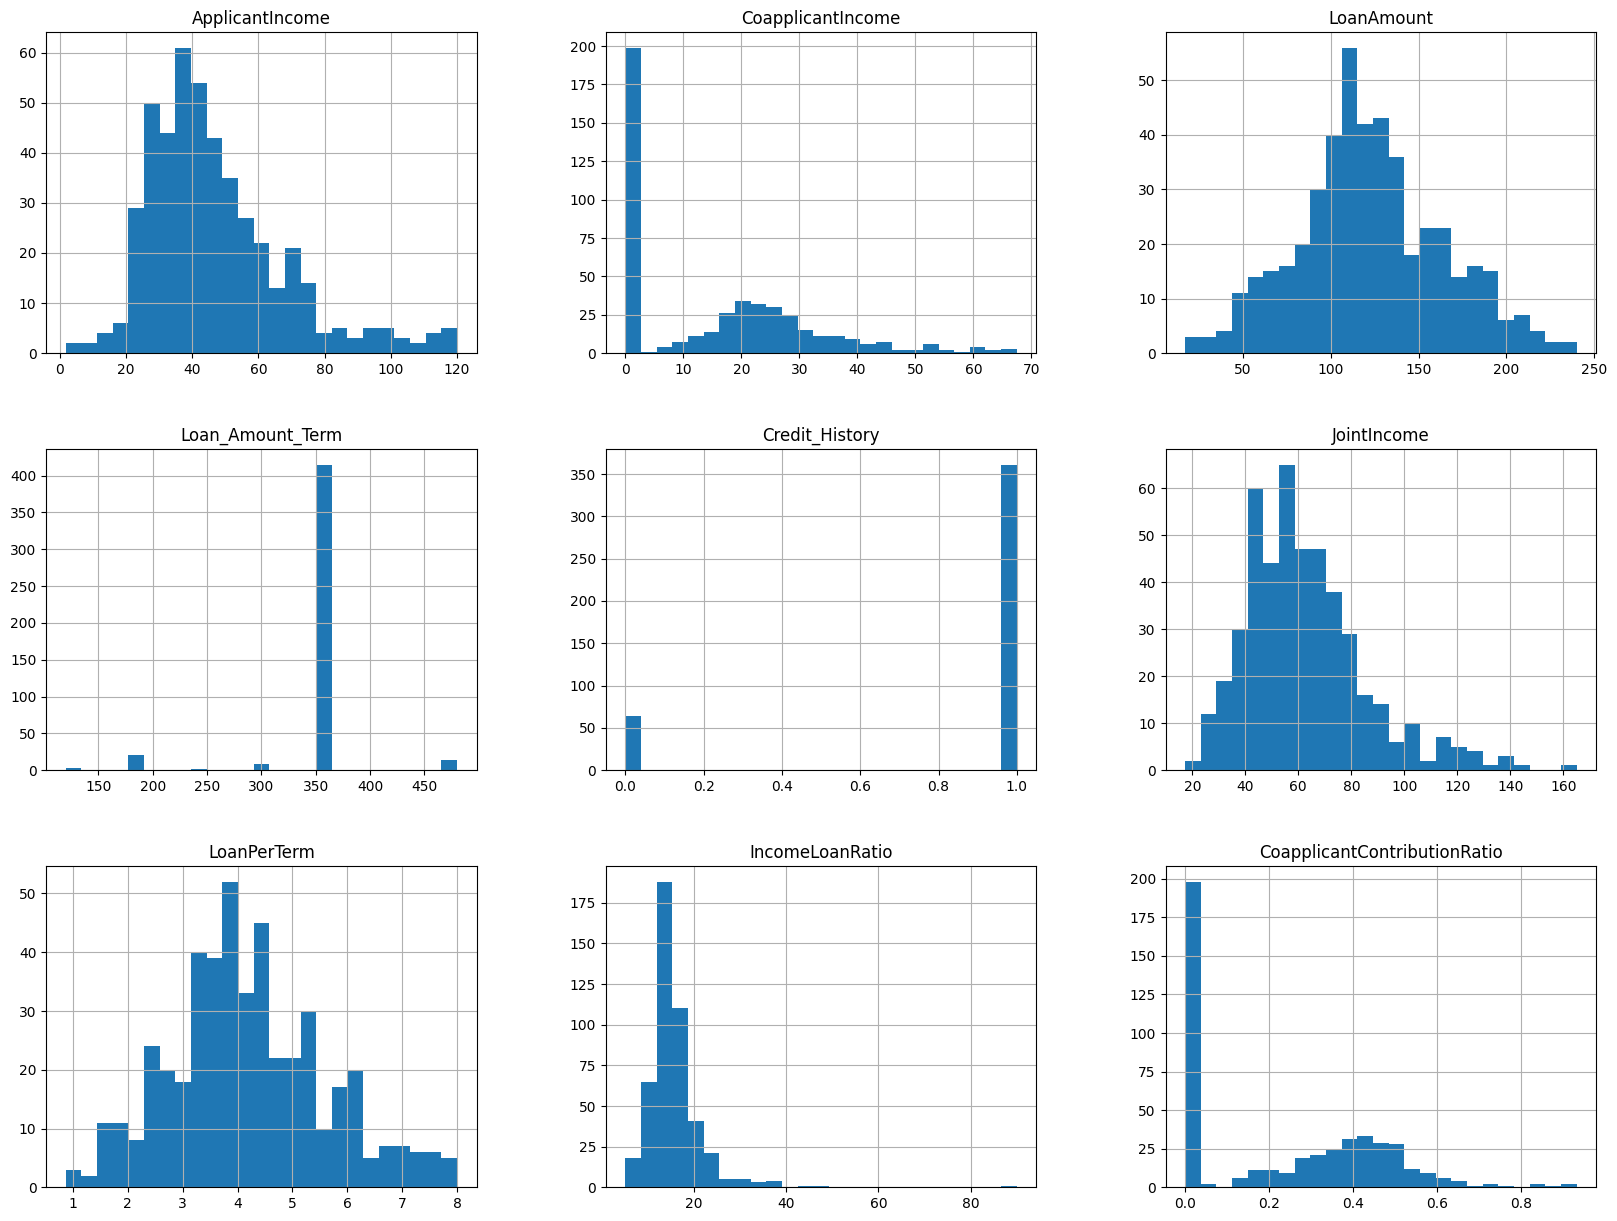

In [7]:
import matplotlib.pyplot as plt
loans.hist(bins=25, figsize=(20,15))
plt.show()

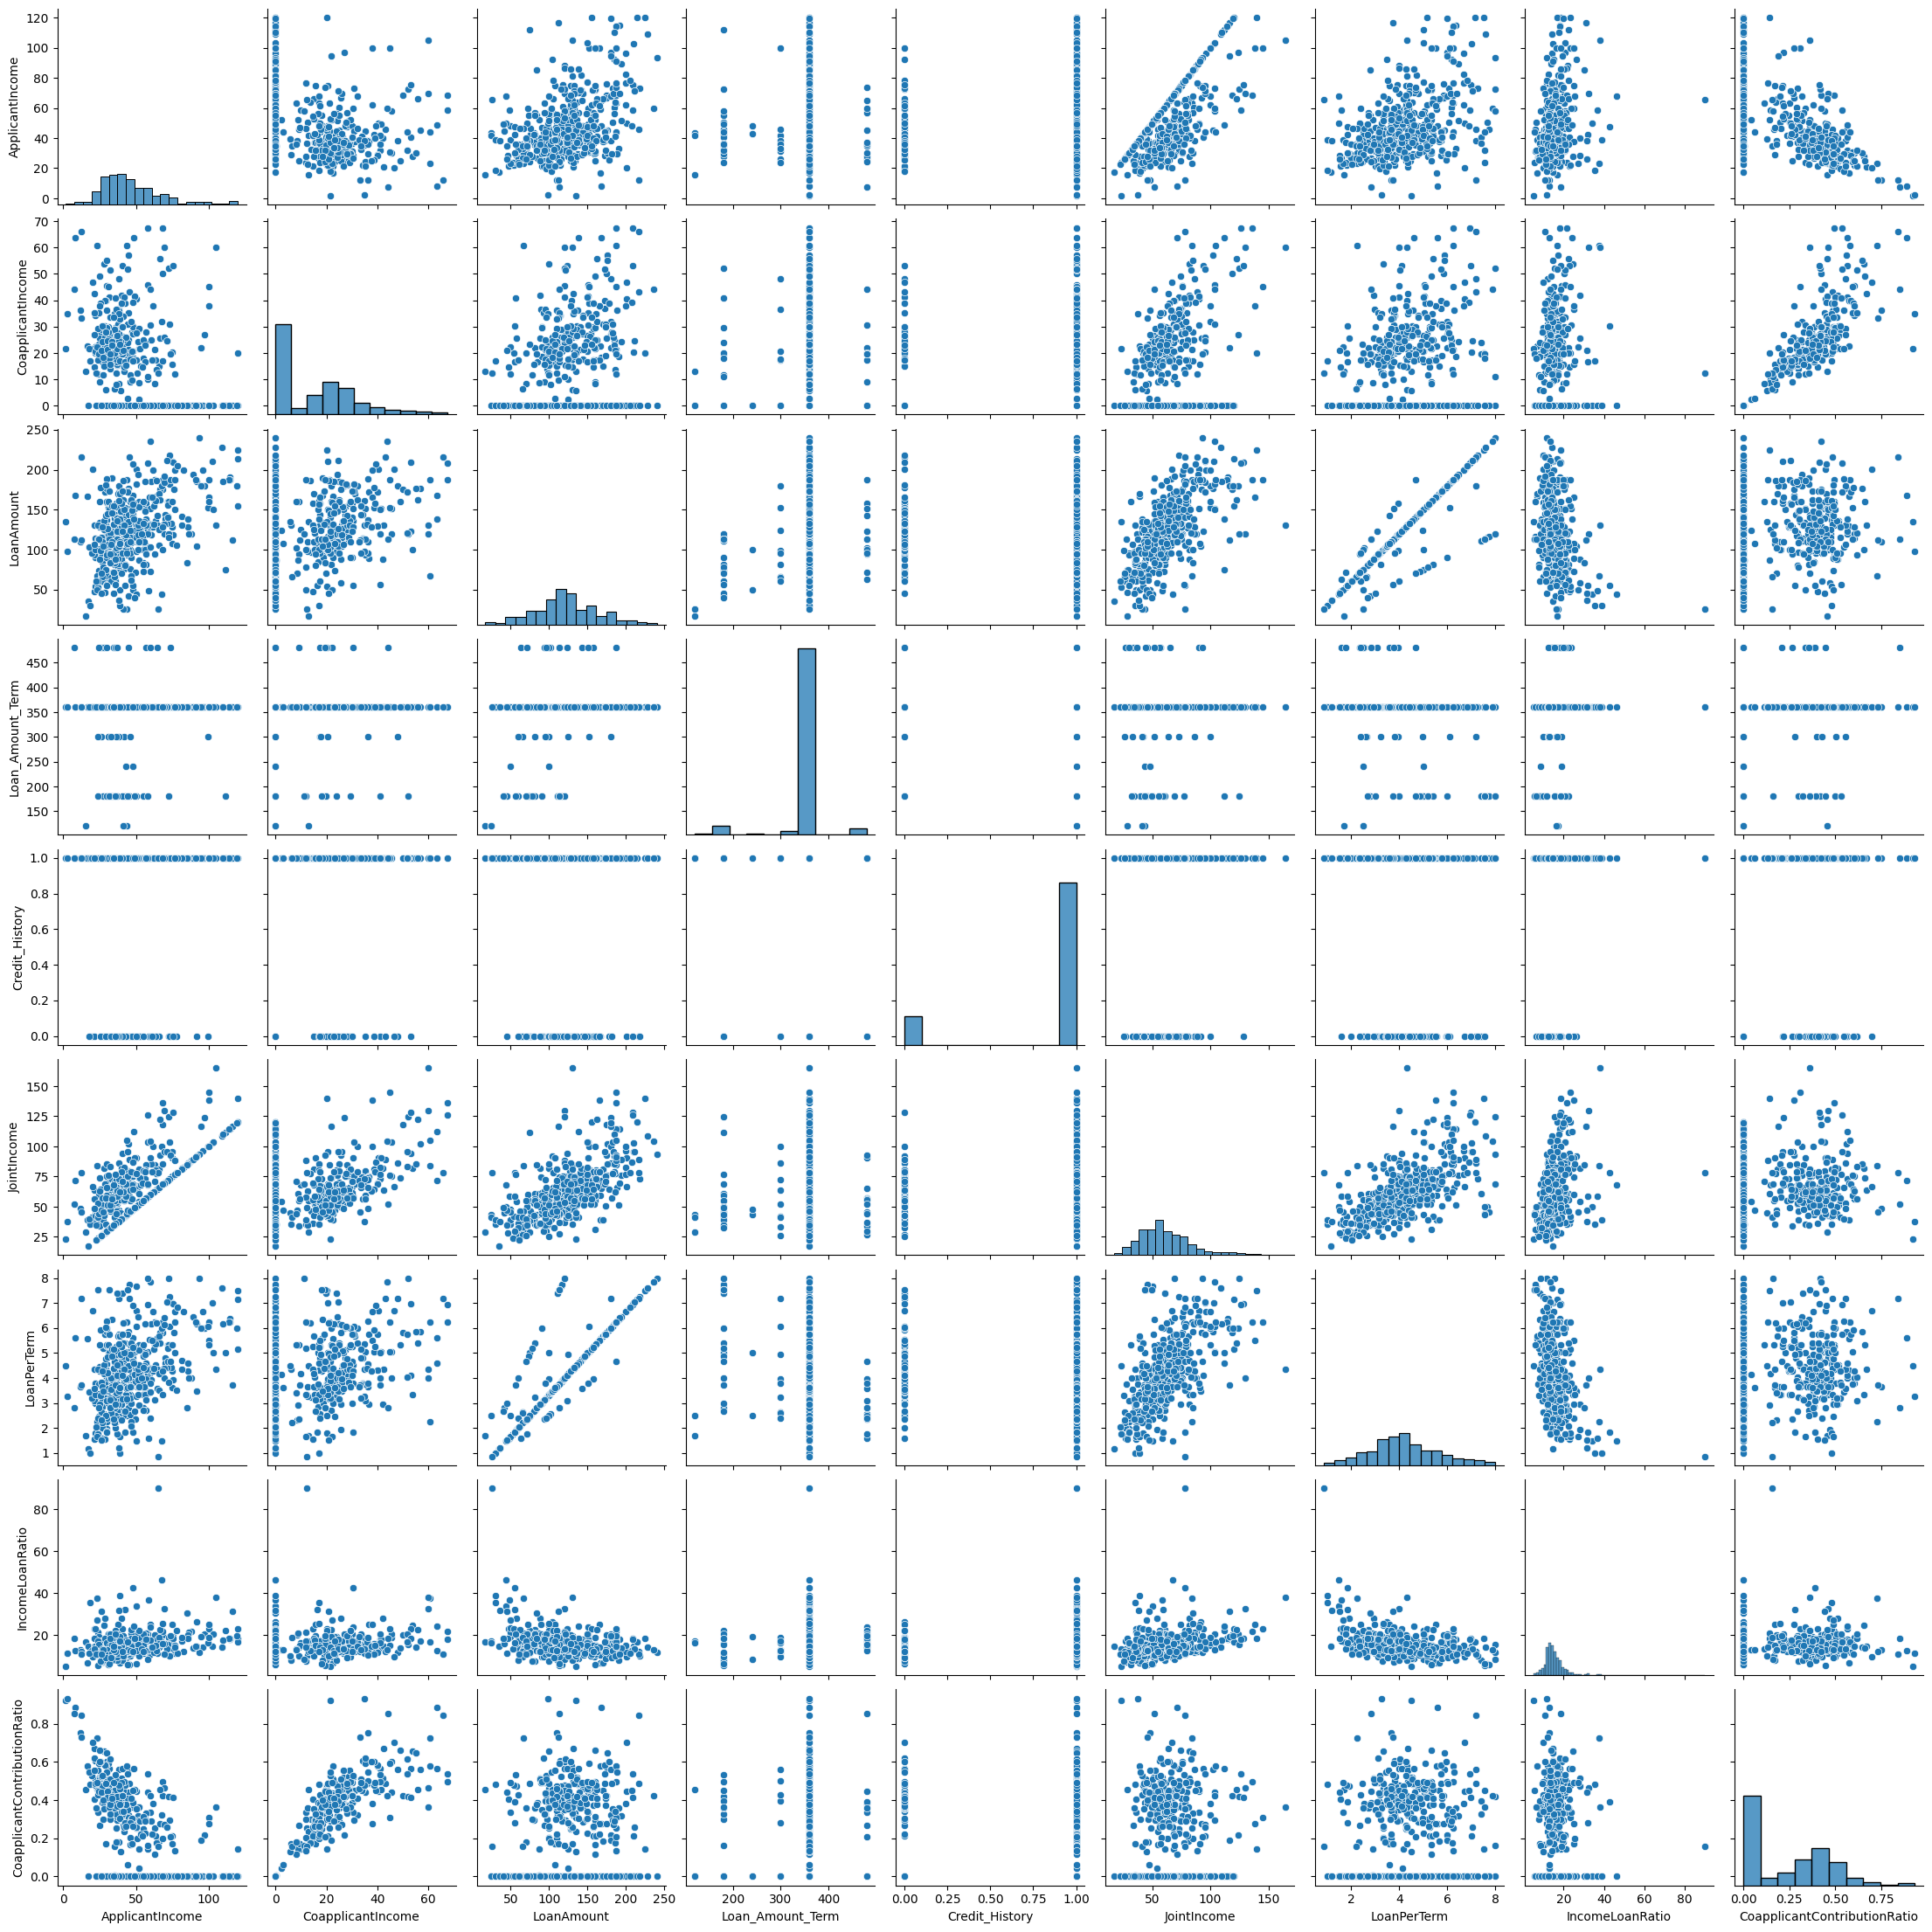

In [8]:
import seaborn as sb

sb.pairplot(loans)

C:\Users\Spencer\AppData\Local\Temp\ipykernel_12844\692139893.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = loans.corr()


<AxesSubplot: >

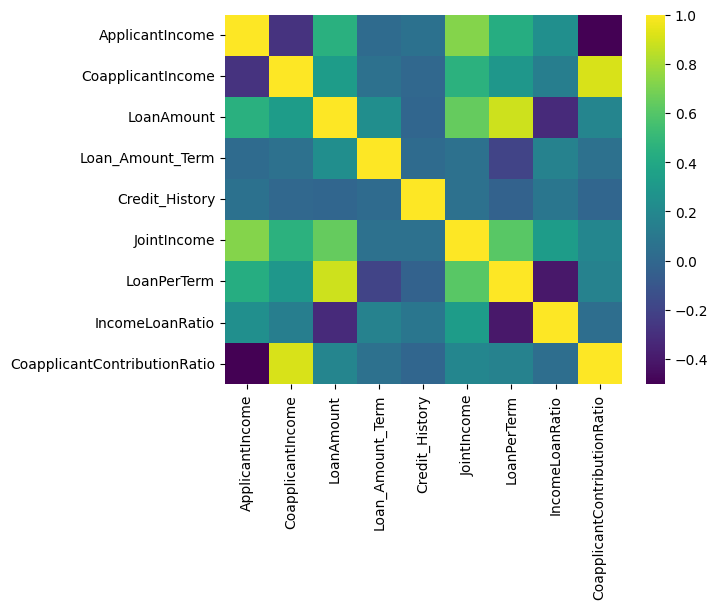

In [9]:
corr_matrix = loans.corr()

color_palette = 'viridis'

sb.heatmap(corr_matrix, cmap=color_palette)

In [16]:
import numpy as np

def plot_scatter(df, col_name_x, col_name_y, color_col_name):
    labels, index = np.unique(df[color_col_name], return_inverse=True)

    fig, ax = plt.subplots()
    sc = ax.scatter(df[col_name_x], df[col_name_y], marker = 'o', c = index, alpha = 0.6)
    ax.legend(sc.legend_elements()[0], labels)
    plt.show()

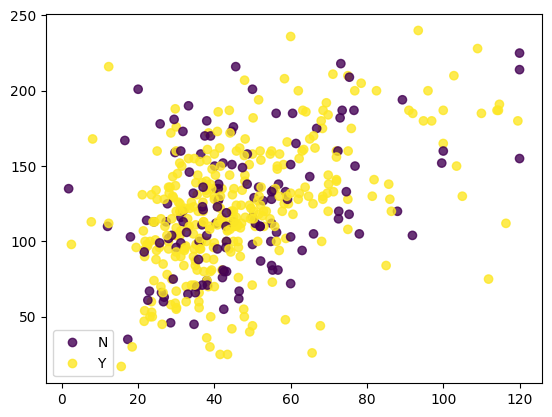

In [11]:
plot_scatter(loans, 'ApplicantIncome', 'LoanAmount', 'Loan_Status')

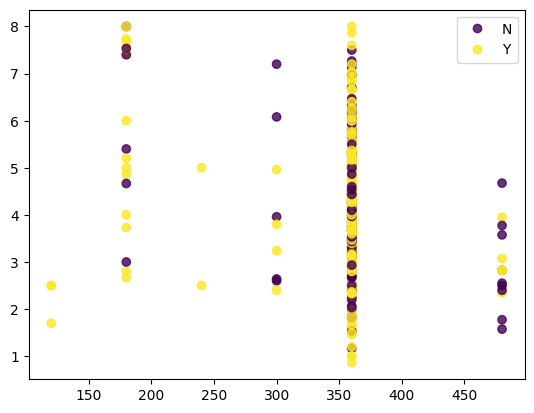

In [12]:
plot_scatter(loans, 'Loan_Amount_Term', 'LoanPerTerm', 'Loan_Status')

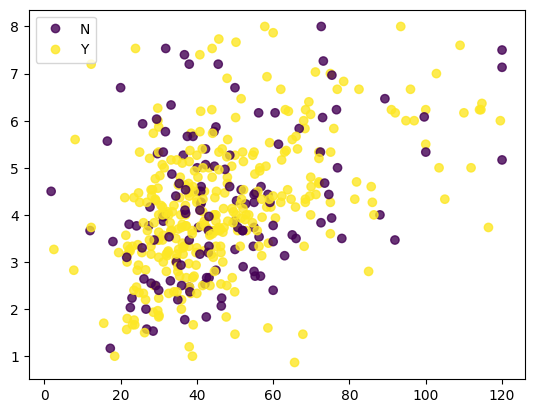

In [13]:
plot_scatter(loans, 'ApplicantIncome', 'LoanPerTerm', 'Loan_Status')

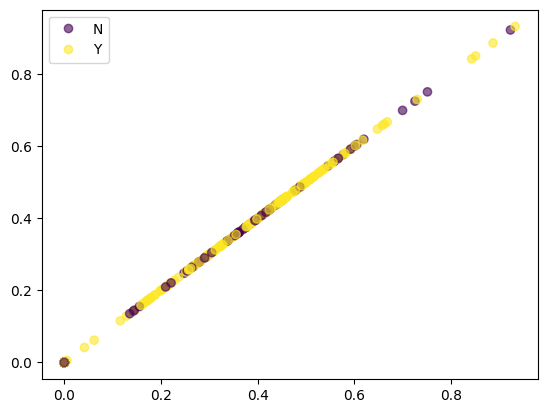

In [17]:
plot_scatter(loans, 'CoapplicantContributionRatio', 'CoapplicantContributionRatio', 'Loan_Status')

In [15]:
def prepareData(data):
    

SyntaxError: incomplete input (3457544330.py, line 2)